## Setup

In [124]:
# to get loading bars to work run the following command in a jupyter terminal: conda install -c conda-forge jupyterlab_widgets

import os
import pandas as pd
import numpy as np
import scipy as sc
from scipy.fft import fft, fftfreq
import eispac
import shutil
from pathlib import Path

from astropy.io import fits
from astropy.utils.data import download_file
from astropy import constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
from  astropy.wcs.utils  import  wcs_to_celestial_frame
from astropy.wcs import WCS

import sunpy
from sunpy.net import Fido, attrs as a
import matplotlib.pyplot as plt
from sunpy.map import Map
from sunpy.coordinates import frames
from sunpy.map.header_helper import make_heliographic_header


In [13]:
#Creating file structure

Path("./data/q1e").mkdir(parents=True, exist_ok=True)
Path("./templates").mkdir(parents=True, exist_ok=True)

filepath = './data'

## Question 1

### b)

In [15]:
result = Fido.search(a.Time('2020/10/23 00:00:00', '2020/10/23 00:1:00'), a.Instrument.hmi)
print(result)

Results from 1 Provider:

3 Results from the VSOClient:
Source: https://sdac.virtualsolar.org/cgi/search
Data retrieval status: https://docs.virtualsolar.org/wiki/VSOHealthReport

       Start Time               End Time        Source Instrument ... Extent Width Extent Length Extent Type   Size  
                                                                  ...                                         Mibyte 
----------------------- ----------------------- ------ ---------- ... ------------ ------------- ----------- --------
2020-10-23 00:00:28.000 2020-10-23 00:00:29.000    SDO        HMI ...         4096          4096    FULLDISK -0.00098
2020-10-23 00:00:28.000 2020-10-23 00:00:29.000    SDO        HMI ...         4096          4096    FULLDISK -0.00098
2020-10-23 00:00:28.000 2020-10-23 00:00:29.000    SDO        HMI ...         4096          4096    FULLDISK -0.00098




In [17]:
result = Fido.search(a.Time('2015/10/23 00:00:00', '2015/10/23 00:1:00'), a.Instrument.hmi, a.Physobs.los_magnetic_field)
result[0, 1]

Start Time,End Time,Source,Instrument,Wavelength,Datatype,Extent Length,Extent Type,Extent Width,Physobs,Provider,Size,Wavetype,fileid,fileurl
,,,,Angstrom,,,,,,,Mibyte,,,
Time,Time,str3,str3,float64[2],object,object,str8,object,str18,str4,float64,str6,str132,object
2015-10-23 00:00:29.000,2015-10-23 00:00:30.000,SDO,HMI,6173.0 .. 6174.0,None,4096,FULLDISK,4096,LOS_magnetic_field,JSOC,-0.00098,NARROW,hmi__m_45s:15993602:15993602,None


In [19]:
downloaded_file = Fido.fetch(result[0, 1], path = filepath)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [21]:
result = Fido.search(a.Time('2015/10/23 00:00:00', '2015/10/23 00:1:00'), a.Instrument.hmi, a.Physobs.intensity)

In [23]:
result

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2015-10-23 00:00:29.000,2015-10-23 00:00:30.000,SDO,HMI,6173.0 .. 6174.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,-0.00098


In [25]:
downloaded_file2 = Fido.fetch(result[0], path = filepath)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

### c)

In [34]:
hmi_map = Map(downloaded_file[0])

In [36]:
cont_map = Map(downloaded_file2[0])

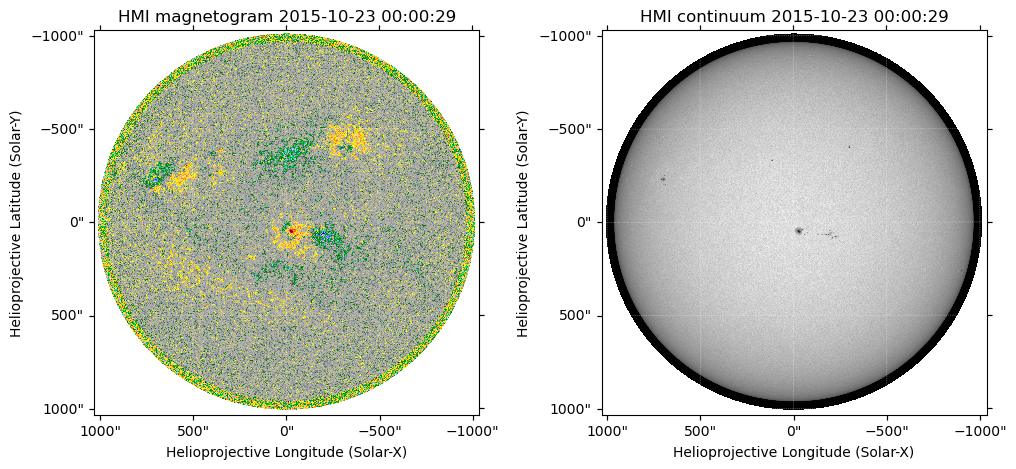

In [40]:
fig = plt.figure(figsize=(12,5))

ax1=fig.add_subplot(121, projection=hmi_map)

# specifying colour map
hmi_map.plot_settings['cmap'] = "hmimag"

# clip range for colorbar scaling
hmi_map.plot_settings['norm'] = plt.Normalize(-1500, 1500)

hmi_map.plot(axes=ax1)

ax2 = fig.add_subplot(122, projection=cont_map)
cont_map.plot(axes=ax2);
plt.savefig('HMI magnetogram and continuum')

plt.show()

In [63]:
stony_header = make_heliographic_header(hmi_map.date, hmi_map.observer_coordinate, shape = (720, 720), frame = 'stonyhurst')
stony_wcs = WCS(stony_header) #perform World Coordinate System transformation

In [65]:
outmap = hmi_map.reproject_to(stony_wcs)

2025-12-18 11:03:13 - reproject.common - INFO: Calling _reproject_full in non-dask mode


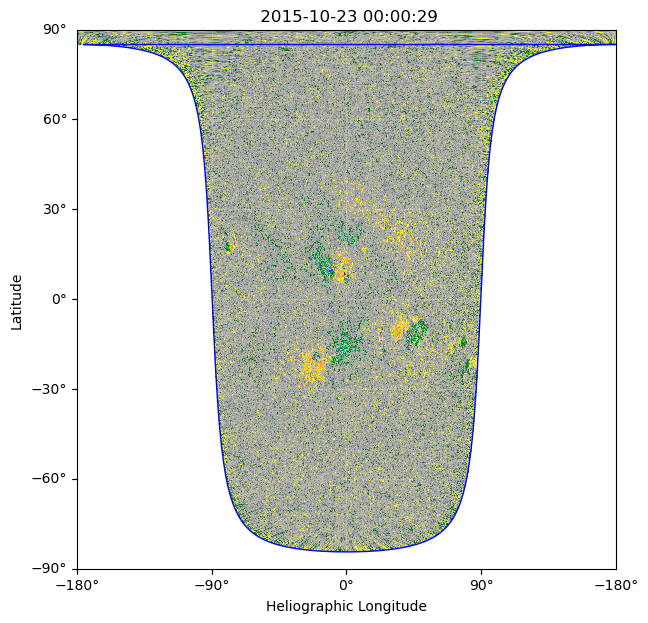

In [70]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection = outmap)
outmap.plot(axes = ax)
outmap.draw_limb(color = 'blue')
plt.savefig('stonyhurst projection')

plt.show()

### e)

In [5]:
result = Fido.search(a.Time('2020/10/23 00:00:00', '2020/10/23 00:1:00'), a.jsoc.Series('hmi.mrsynop_small_720s'))
print(result)

Results from 1 Provider:

207 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

TELESCOP  INSTRUME WAVELNTH CAR_ROT
-------- --------- -------- -------
 SDO/HMI HMI_SIDE1   6173.0    2097
 SDO/HMI HMI_SIDE1   6173.0    2098
 SDO/HMI HMI_SIDE1   6173.0    2099
 SDO/HMI HMI_SIDE1   6173.0    2100
 SDO/HMI HMI_SIDE1   6173.0    2101
 SDO/HMI HMI_SIDE1   6173.0    2102
 SDO/HMI HMI_SIDE1   6173.0    2103
 SDO/HMI HMI_SIDE1   6173.0    2104
 SDO/HMI HMI_SIDE1   6173.0    2105
 SDO/HMI HMI_SIDE1   6173.0    2106
 SDO/HMI HMI_SIDE1   6173.0    2107
 SDO/HMI HMI_SIDE1   6173.0    2108
 SDO/HMI HMI_SIDE1   6173.0    2109
     ...       ...      ...     ...
 SDO/HMI HMI_SIDE1   6173.0    2291
 SDO/HMI HMI_SIDE1   6173.0    2292
 SDO/HMI HMI_SIDE1   6173.0    2293
 SDO/HMI HMI_SIDE1   6173.0    2294
 SDO/HMI HMI_SIDE1   6173.0    2295
 SDO/HMI HMI_SIDE1   6173.0    2296
 SDO/HMI HMI_SIDE1   6173.0    2297
 SDO/HMI HMI_SIDE1   6173.0    2298
 SDO/HMI HMI_SIDE1   6173.0    2299
 SDO/HM

In [9]:
filepath = './data/q1e'
result = Fido.search(a.Time('2020/10/23 00:00:00', '2020/10/23 00:1:00'), a.jsoc.Series('hmi.mrsynop_small_720s'), 
                     a.jsoc.Notify('{null_email}'))
print(result)

Results from 1 Provider:

207 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

TELESCOP  INSTRUME WAVELNTH CAR_ROT
-------- --------- -------- -------
 SDO/HMI HMI_SIDE1   6173.0    2097
 SDO/HMI HMI_SIDE1   6173.0    2098
 SDO/HMI HMI_SIDE1   6173.0    2099
 SDO/HMI HMI_SIDE1   6173.0    2100
 SDO/HMI HMI_SIDE1   6173.0    2101
 SDO/HMI HMI_SIDE1   6173.0    2102
 SDO/HMI HMI_SIDE1   6173.0    2103
 SDO/HMI HMI_SIDE1   6173.0    2104
 SDO/HMI HMI_SIDE1   6173.0    2105
 SDO/HMI HMI_SIDE1   6173.0    2106
 SDO/HMI HMI_SIDE1   6173.0    2107
 SDO/HMI HMI_SIDE1   6173.0    2108
 SDO/HMI HMI_SIDE1   6173.0    2109
     ...       ...      ...     ...
 SDO/HMI HMI_SIDE1   6173.0    2291
 SDO/HMI HMI_SIDE1   6173.0    2292
 SDO/HMI HMI_SIDE1   6173.0    2293
 SDO/HMI HMI_SIDE1   6173.0    2294
 SDO/HMI HMI_SIDE1   6173.0    2295
 SDO/HMI HMI_SIDE1   6173.0    2296
 SDO/HMI HMI_SIDE1   6173.0    2297
 SDO/HMI HMI_SIDE1   6173.0    2298
 SDO/HMI HMI_SIDE1   6173.0    2299
 SDO/HM

In [11]:
files = Fido.fetch(result, path = filepath)
print(files)

2025-12-01 22:36:25 - drms - INFO: Export request pending. [id=JSOC_20251201_009841_X_IN, status=2]
2025-12-01 22:36:25 - drms - INFO: Waiting for 0 seconds...
2025-12-01 22:36:26 - drms - INFO: Export request pending. [id=JSOC_20251201_009841_X_IN, status=1]
2025-12-01 22:36:26 - drms - INFO: Waiting for 5 seconds...
2025-12-01 22:36:31 - drms - INFO: Export request pending. [id=JSOC_20251201_009841_X_IN, status=1]
2025-12-01 22:36:31 - drms - INFO: Waiting for 5 seconds...
2025-12-01 22:36:37 - drms - INFO: Export request pending. [id=JSOC_20251201_009841_X_IN, status=1]
2025-12-01 22:36:37 - drms - INFO: Waiting for 5 seconds...
2025-12-01 22:36:43 - drms - INFO: Export request pending. [id=JSOC_20251201_009841_X_IN, status=1]
2025-12-01 22:36:43 - drms - INFO: Waiting for 5 seconds...
2025-12-01 22:36:48 - drms - INFO: Export request pending. [id=JSOC_20251201_009841_X_IN, status=1]
2025-12-01 22:36:48 - drms - INFO: Waiting for 5 seconds...
2025-12-01 22:36:54 - drms - INFO: Expor

INFO: 414 URLs found for download. Full request totaling 413MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/414 [00:00<?, ?file/s]

hmi.mrsynop_small_720s.2097.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2097.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2098.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2098.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2099.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2099.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2100.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2100.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2101.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2101.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2102.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2102.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2103.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2103.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2104.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2104.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2105.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2105.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2106.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2106.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2107.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2107.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2108.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2108.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2109.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2109.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2110.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2110.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2111.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2111.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2112.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2112.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2113.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2113.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2114.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2114.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2115.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2115.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2116.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2116.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2117.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2117.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2118.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2118.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2119.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2119.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2120.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2120.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2121.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2121.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2122.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2122.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2123.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2123.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2124.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2124.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2125.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2125.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2126.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2126.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2127.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2127.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2128.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2128.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2129.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2129.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2130.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2130.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2131.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2131.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2132.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2132.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2133.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2133.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2134.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2134.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2135.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2135.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2136.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2136.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2137.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2137.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2138.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2138.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2139.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2139.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2140.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2140.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2141.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2141.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2142.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2142.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2143.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2143.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2144.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2144.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2145.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2145.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2146.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2146.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2147.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2147.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2148.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2148.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2149.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2149.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2150.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2150.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2151.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2151.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2152.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2152.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2153.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2153.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2154.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2154.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2155.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2155.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2156.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2156.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2157.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2157.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2158.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2158.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2159.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2159.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2160.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2160.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2161.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2161.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2162.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2162.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2163.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2163.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2164.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2164.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2165.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2165.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2166.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2166.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2167.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2167.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2168.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2168.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2169.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2169.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2170.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2170.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2171.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2171.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2172.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2172.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2173.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2173.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2174.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2174.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2175.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2175.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2176.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2176.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2177.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2177.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2178.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2178.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2179.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2179.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2180.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2180.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2181.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2181.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2182.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2182.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2183.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2183.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2184.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2184.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2185.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2185.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2186.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2186.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2187.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2187.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2188.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2188.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2189.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2189.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2190.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2190.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2191.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2191.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2192.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2192.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2193.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2193.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2194.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2194.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2195.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2195.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2196.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2196.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2197.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2197.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2198.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2198.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2199.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2199.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2200.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2200.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2201.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2201.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2202.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2202.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2203.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2203.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2204.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2204.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2205.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2205.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2206.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2206.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2207.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2207.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2208.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2208.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2209.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2209.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2210.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2210.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2211.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2211.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2212.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2212.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2213.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2213.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2214.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2214.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2215.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2215.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2216.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2216.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2217.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2217.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2218.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2218.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2219.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2219.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2220.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2220.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2221.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2221.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2222.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2222.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2223.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2223.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2224.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2224.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2225.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2225.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2226.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2226.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2227.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2227.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2228.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2228.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2229.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2229.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2230.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2230.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2231.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2231.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2232.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2232.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2233.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2233.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2234.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2234.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2235.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2235.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2236.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2236.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2237.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2237.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2238.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2238.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2239.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2239.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2240.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2240.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2241.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2241.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2242.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2242.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2243.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2243.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2244.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2244.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2245.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2245.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2246.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2246.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2247.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2247.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2248.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2248.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2249.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2249.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2250.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2250.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2251.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2251.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2252.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2252.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2253.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2253.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2254.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2254.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2255.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2255.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2256.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2256.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2257.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2257.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2258.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2258.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2259.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2259.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2260.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2260.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2261.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2261.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2262.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2262.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2263.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2263.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2264.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2264.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2265.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2265.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2266.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2266.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2267.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2267.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2268.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2268.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2269.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2269.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2270.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2270.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2271.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2271.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2272.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2272.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2273.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2273.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2274.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2274.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2275.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2275.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2276.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2276.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2277.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2277.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2278.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2278.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2279.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2279.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2280.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2280.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2281.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2281.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2282.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2282.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2283.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2283.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2284.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2284.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2285.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2285.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2286.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2286.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2287.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2287.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2288.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2288.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2289.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2289.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2290.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2290.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2291.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2291.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2292.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2292.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2293.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2293.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2294.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2294.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2295.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2295.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2296.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2296.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2297.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2297.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2298.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2298.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2299.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2299.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2300.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2300.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2301.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2301.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2302.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2302.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2303.synopMr.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

hmi.mrsynop_small_720s.2303.epts.fits:   0%|          | 0.00/1.05M [00:00<?, ?B/s]

['data\\q1e\\hmi.mrsynop_small_720s.2097.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2097.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2098.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2098.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2099.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2099.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2100.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2100.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2101.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2101.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2102.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2102.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2103.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2103.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2104.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2104.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2105.synopMr.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2105.epts.fits', 'data\\q1e\\hmi.mrsynop_small_720s.2

In [74]:
hmi_map = sunpy.map.Map('./data/q1e/hmi.mrsynop_small_720s.2130.synopMr.fits')
shape = (720, 1440)
carr_header = make_heliographic_header(hmi_map.date, hmi_map.observer_coordinate, shape, frame='carrington')

For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.util.logger]
2025-12-18 11:18:14 - sunpy - WARNING: SunpyMetadataWarning: Missing metadata for observer: assuming Earth-based observer.
For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs



In [76]:
outmap = hmi_map.reproject_to(carr_header)

2025-12-18 11:18:15 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.
2025-12-18 11:18:15 - reproject.common - INFO: Calling _reproject_full in non-dask mode


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


2025-12-18 11:18:15 - sunpy - INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


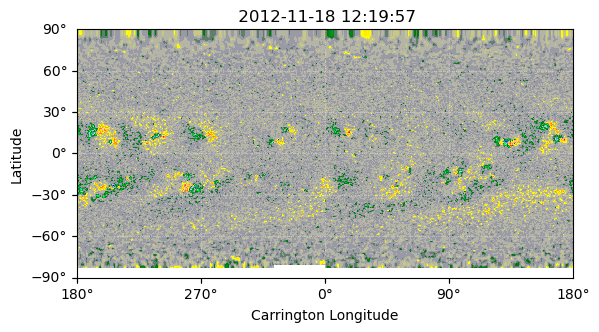

In [78]:
fig = plt.figure()
ax = fig.add_subplot(projection = outmap)
outmap.plot(axes = ax)
plt.savefig('carrington map')

plt.show()

## Question 2

### a)

In [82]:
data_file = './data/allsites-waverage-fill-2010.fits'

In [84]:
with fits.open(data_file) as hdul:
    hdu_list=hdul
    
hdu_list.info()

Filename: ./data/allsites-waverage-fill-2010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (1, 788400)   float64   


In [86]:
hdu_list[0].header

SIMPLE  =                    T / Written by IDL:  Wed Feb  9 12:31:27 2022      
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                    1 /                                                
NAXIS2  =               788400 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2022-02-09'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    

In [88]:
head = hdu_list[0].header

In [90]:
print(head['NAXIS2'])

788400


In [92]:
with fits.open(data_file) as hdul:
    hdu_list=hdul
    plot_data = hdu_list[0].data

In [94]:
print(type(plot_data))
print(plot_data.shape)

<class 'numpy.ndarray'>
(788400, 1)


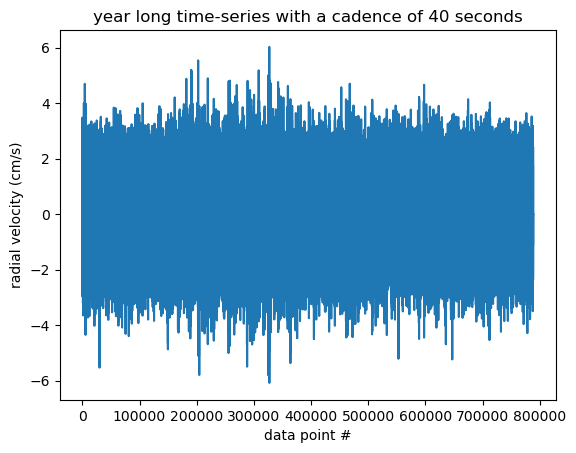

In [118]:
plt.plot(plot_data)
plt.title('year long time-series with a cadence of 40 seconds')
plt.xlabel('data point #')
plt.ylabel('radial velocity (cm/s)')
plt.savefig('year long time-series of radial velocity measurements with a cadence of 40 seconds')

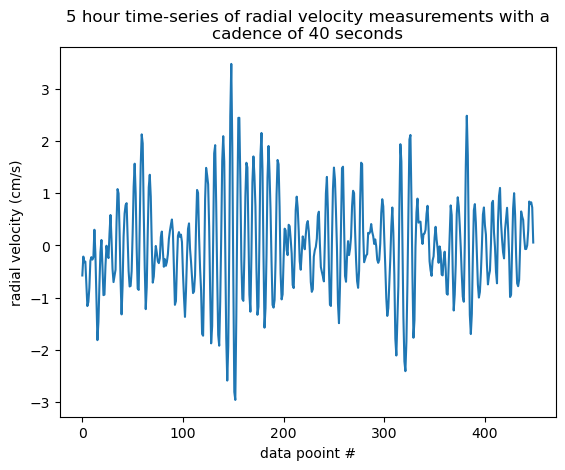

In [122]:
hours = 5
seconds = hours * 3600
data_points = seconds / 40 # 40 second cadence
datapoints = data_points - 1 # as index 0 is a valid data point
datapoints = int(datapoints) # index can only be a integer

from textwrap import wrap

plt.plot(plot_data[:datapoints])
title = '{} hour time-series of radial velocity measurements with a cadence of 40 seconds'.format(hours)
plt.title('\n'.join(wrap(title,60)))
plt.xlabel('data pooint #')
plt.ylabel('radial velocity (cm/s)')
plt.savefig('{} hour time-series of radial velocity measurements with a cadence of 40 seconds'.format(hours))


### c)

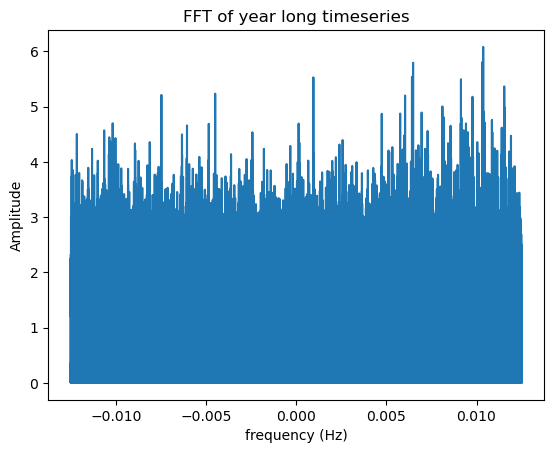

In [128]:
SAMPLE_RATE = 1/40

yf = fft(plot_data)
xf = fftfreq(788400, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.title('FFT of year long timeseries')
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig('timeseries fft')
plt.show()

In [134]:
#power spectral density
fs = 1/40
BL = 788400

df = fs / BL # frequency resolution

PSD = np.abs(yf)**2 / (2 * df)

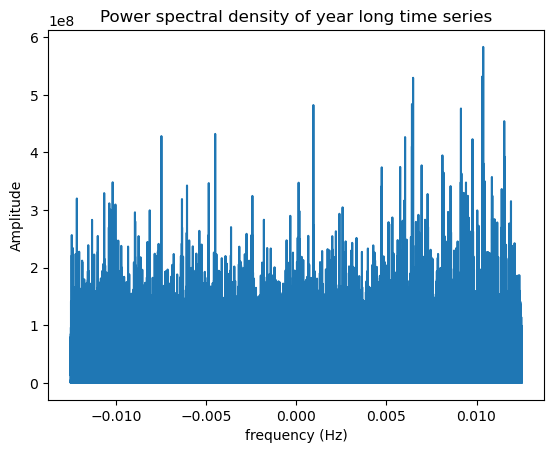

In [132]:
plt.plot(xf, PSD)
plt.title('Power spectral density of year long time series')
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude')
plt.savefig('Power spectral density of year long time series')
plt.show()

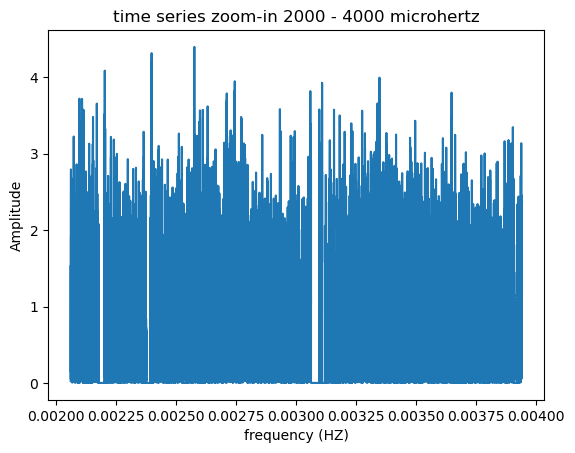

In [136]:
plt.plot(xf[65000:124200], np.abs(yf[65000:124200]))
plt.title('time series zoom-in 2000 - 4000 microhertz')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('time series zoom-in 2000 - 4000 microhertz')
plt.show()

### d)

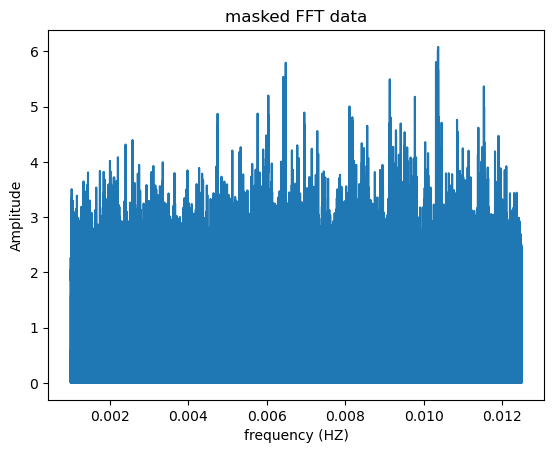

In [138]:
plt.plot(xf[31500:394200], np.abs(yf[31500:394200]))
plt.title('masked FFT data')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('masked FFT data')
plt.show()

In [140]:
masked_y = np.abs(yf[31500:394200])
masked_x = np.abs(xf[31500:394200])

In [142]:
masked_y = masked_y.reshape(1, -1)

In [144]:
masked_y.shape

(1, 362700)

In [146]:
masked_y = masked_y.ravel()

In [148]:
masked_y

array([1.86481285, 2.26889539, 1.09465897, ..., 0.08216024, 0.51180762,
       0.47766453])

In [150]:
fs = 1/40
BL = 394200-31500

df = fs / BL

PSD = np.abs(masked_y)**2 / (2 * df)

In [152]:
location, value = sc.signal.find_peaks(masked_y, height = 2.5, threshold = 1)
PSDlocation, PSDvalue = sc.signal.find_peaks(PSD, height = 0.5e8, threshold = 0.3e8)

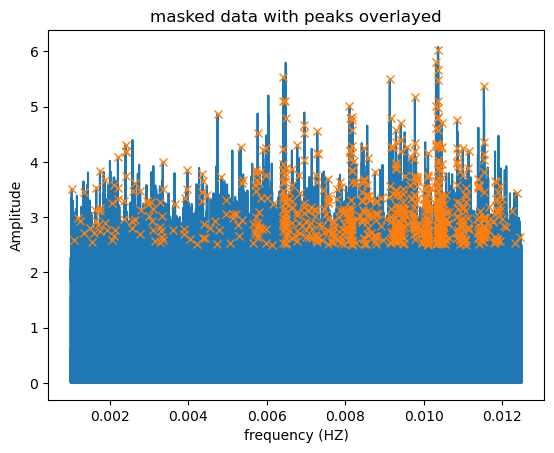

In [158]:
plt.plot(masked_x ,masked_y)
plt.plot(masked_x[location], masked_y[location],'x')
plt.title('masked data with peaks overlayed')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('masked data with peaks')

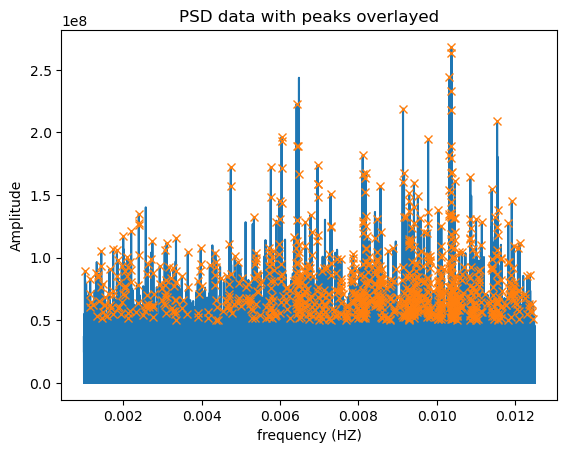

In [156]:
plt.plot(masked_x ,PSD)
plt.plot(masked_x[PSDlocation], PSD[PSDlocation],'x')
plt.title('PSD data with peaks overlayed')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('PSD data with peaks overlayed')

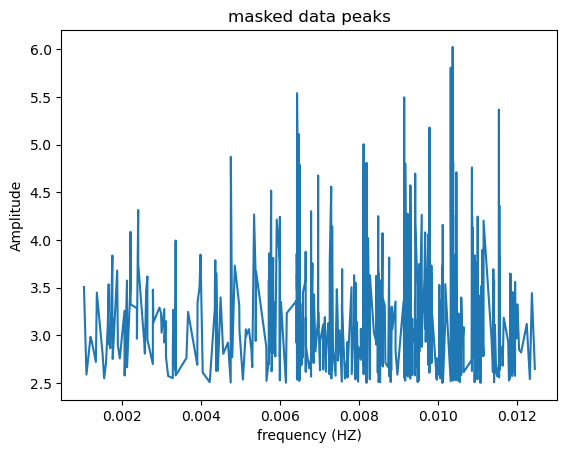

In [160]:
plt.plot(masked_x[location], masked_y[location])
plt.title('masked data peaks')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('FFT peaks plotted')

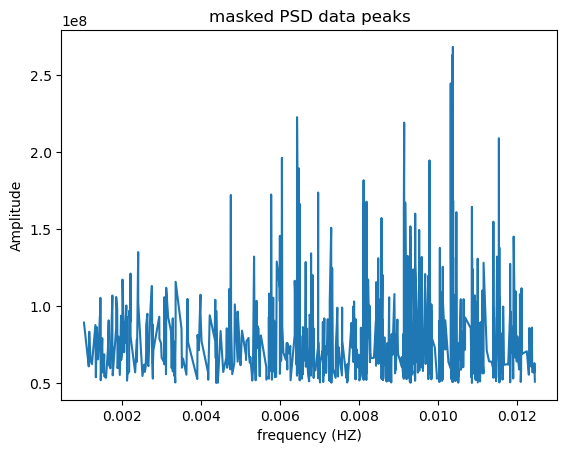

In [162]:
PSD_x = masked_x[PSDlocation]
PSD_y = PSD[PSDlocation]

plt.plot(PSD_x, PSD_y)
plt.title('masked PSD data peaks')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('masked PSD data peaks')

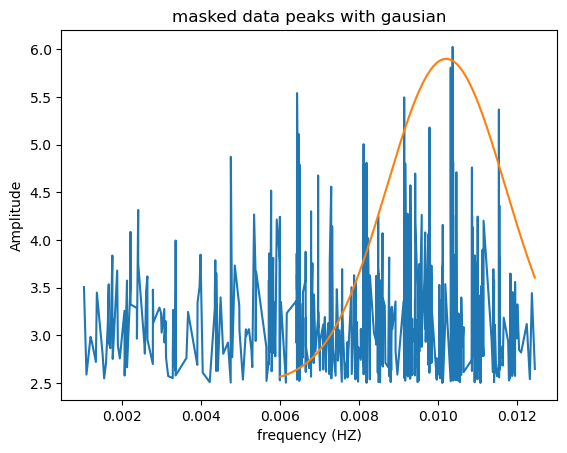

In [172]:
def gaus(y0, x, a, x0, sigma):
    return y0 + a*np.exp(-(x-x0)**2/(2*sigma**2)) # gausian funtion

x = np.linspace(0.006,0.01244771,10000)
ymin = 2.5
mean = 0.0102
sigma = 0.0015

y2 = gaus(2.5, x, 3.4, mean, sigma)

plt.plot(masked_x[location], masked_y[location])
plt.plot(x,y2)
plt.title('masked data peaks with gausian')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude')
plt.savefig('masked FFT data peaks with gausian')

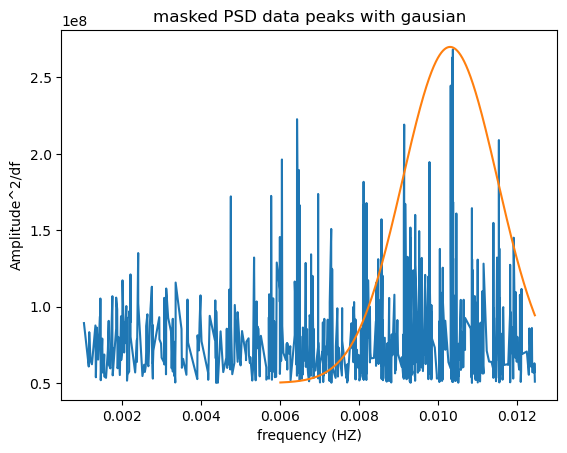

In [174]:
mean = 0.0103
sigma = 0.0012
y = gaus(0.5e8, x,2.2e8,mean,sigma)

plt.plot(PSD_x, PSD_y)
plt.plot(x,y)
plt.title('masked PSD data peaks with gausian')
plt.xlabel('frequency (HZ)')
plt.ylabel('Amplitude^2/df')
plt.savefig('masked PSD data peaks with gausian')

In [176]:
v_max = np.max(y)
v_max

269999995.70946825

## Question 3

### a)

In [385]:
data_cube = eispac.read_cube('./data/eis_20070118_181213.data.h5',  284)

Data file,
   C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment\data\eis_20070118_181213.data.h5
Header file,
   C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment\data\eis_20070118_181213.head.h5
Found a wavelength 284.00 [Angstroms] in window 8


In [387]:
data_cube

NDCube
------
Shape: (256, 256, 24)
Physical Types of Axes: [('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat'), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat'), ('em.wl',)]
Unit: erg / (s sr cm2)
Data Type: float32

In [389]:
data_cube.dimensions

C:\Users\James\anaconda3\Lib\site-packages\ndcube\ndcube.py:471: NDCubeDeprecationWarning: Replaced by ndcube.NDCube.shape
  warn_deprecated("Replaced by ndcube.NDCube.shape")


<Quantity [256., 256.,  24.] pix>

In [391]:
data_cube.meta.keys()

dict_keys(['filename_data', 'filename_head', 'wininfo', 'iwin', 'iwin_str', 'index', 'pointing', 'wave', 'radcal', 'slit_width', 'slit_width_units', 'ccd_offset', 'wave_corr', 'wave_corr_t', 'wave_corr_tilt', 'date_obs', 'date_obs_format', 'duration', 'duration_units', 'mod_index', 'aspect', 'aspect_ratio', 'extent_arcsec', 'notes'])

In [393]:
data_cube.meta

{'filename_data': 'C:\\Users\\James\\OneDrive - Northumbria University - Production Azure AD\\year 4\\solar\\assessment\\data\\eis_20070118_181213.data.h5',
 'filename_head': 'C:\\Users\\James\\OneDrive - Northumbria University - Production Azure AD\\year 4\\solar\\assessment\\data\\eis_20070118_181213.head.h5',
 'wininfo': rec.array([(0, 'FE X 184.540', 184.27925, 184.79205, 24,  864),
            (1, 'FE VIII 185.210', 184.94812, 185.4609 , 24,  894),
            (2, 'FE XI 188.230', 187.95776, 188.47047, 24, 1029),
            (3, 'CA XVII 192.820', 192.54938, 193.06197, 24, 1235),
            (4, 'FE XII 195.120', 194.84477, 195.3573 , 24, 1338),
            (5, 'FE XIII 202.040', 201.77391, 202.28625, 24, 1649),
            (6, 'HE II 256.320', 256.04208, 256.55417, 24, 2666),
            (7, 'FE XIV 274.200', 273.93463, 274.44623, 24, 3470),
            (8, 'FE XV 284.160', 283.89716, 284.40848, 24, 3918)],
           dtype=[('iwin', '<i4'), ('line_id', '<U64'), ('wvl_min', '<f4'

In [178]:
data_filename = './data/eis_20070118_181213.data.h5'   # your level-1 HDF5
data_cube = eispac.read_cube(data_filename, 284)  # pick a window / wavelength in Å
raster_sum  =  np.sum(data_cube.data,  axis = 2) 

Data file,
   C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment\data\eis_20070118_181213.data.h5
Header file,
   C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment\data\eis_20070118_181213.head.h5
Found a wavelength 284.00 [Angstroms] in window 8


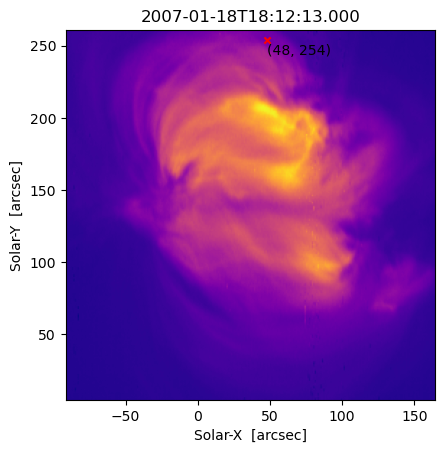

In [192]:
plt.figure()
plt.imshow(raster_sum,  origin='lower',  extent=data_cube.meta['extent_arcsec'],  cmap='plasma')
plt.scatter(48, 254, marker = 'x', color = 'red', s=20)
plt.text(48, 244, "(48, 254)")
plt.title(data_cube.meta['date_obs'][-1]) 
plt.xlabel('Solar-X  [arcsec]') 
plt.ylabel('Solar-Y  [arcsec]')
plt.savefig('image with specific pixel selected')
plt.show()

### b)

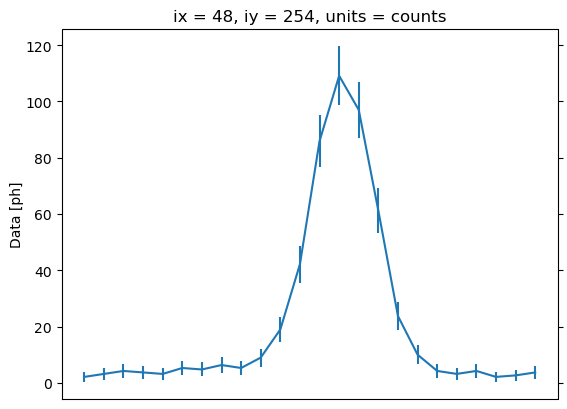

In [196]:
ix  =  48
iy  =  254
spec  =  data_cube[iy,ix,:].remove_radcal()
spec_plot  =  spec.plot()
spec_plot.set_title(f'ix = {ix}, iy = {iy}, units = counts')
plt.savefig('pixel photon count')

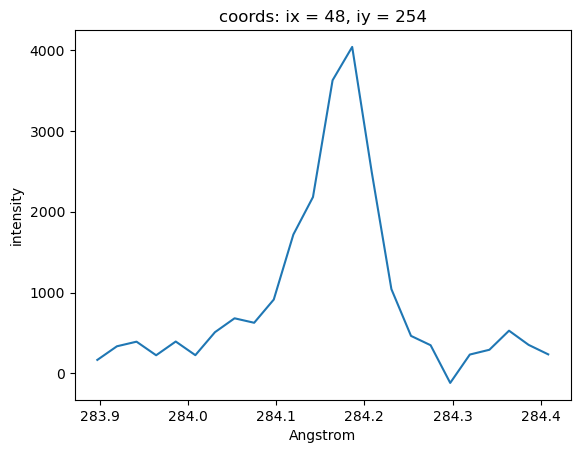

In [206]:
plt.plot(data_cube.meta['wave'], data_cube.data[ix,iy,:])
plt.title(f'coords: ix = {ix}, iy = {iy}')
plt.xlabel('Angstrom')
plt.ylabel('intensity')
plt.savefig('wavelength vs intensity')

In [209]:
template_list  =  eispac.match_templates(data_cube)  
for  file  in  template_list:
    print(file.name)

al_09_284_015.2c.template.h5
fe_15_284_160.1c.template.h5
fe_15_284_160.2c.template.h5


In [211]:
current_dir = './templates'
shutil.copy(template_list[0], current_dir)
shutil.copy(template_list[1], current_dir)
shutil.copy(template_list[2], current_dir)

'./templates\\fe_15_284_160.2c.template.h5'

Data file,
   C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment\data\eis_20070118_181213.data.h5
Header file,
   C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment\data\eis_20070118_181213.head.h5
Found a wavelength 284.09 [Angstroms] in window 8
 + computing fits for 190 exposures, each with 36 spectra
 + running mpfit on 16 cores (of 16)


Finished computing fits!
   runtime : 0:00:14.254985
   6840 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters
Saving EIS fit results...
   Directory: C:\Users\James\OneDrive - Northumbria University - Production Azure AD\year 4\solar\assessment
   Filenames: eis_20070118_181213.al_09_284_015.2c-0.fit.h5
              eis_20070118_181213.fe_15_284_160.2c-1.fit.h5


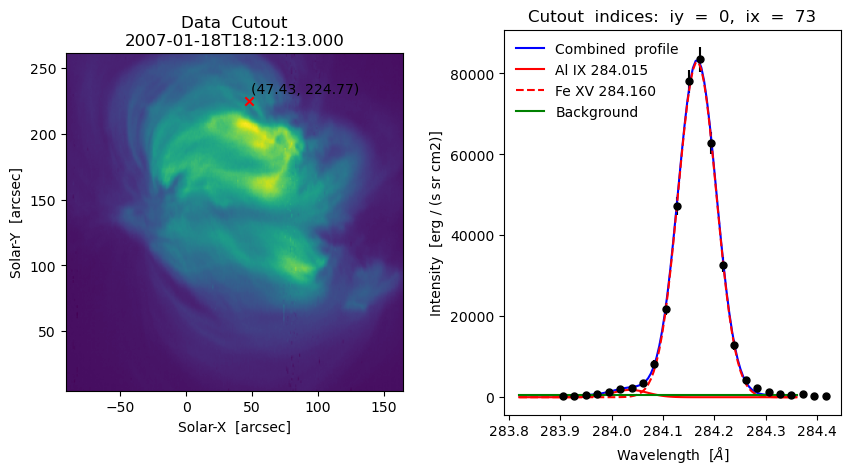

In [213]:
if  __name__  ==  '__main__':

    #  Read  in  the  fit  template  and  EIS  observation
    data_filepath  =  './data/eis_20070118_181213.data.h5'
    template_filepath  =  './templates/fe_15_284_160.2c.template.h5'
    tmplt  =  eispac.read_template(template_filepath)
    data_cube  =  eispac.read_cube(data_filepath,  tmplt.central_wave)

    #  Select  a  cutout  of  the  raster
    eis_frame  =  wcs_to_celestial_frame(data_cube.wcs)
    lower_left  =  [None,  SkyCoord(Tx=-25,  Ty=225,  unit=u.arcsec,  frame=eis_frame)] 
    upper_right  =  [None,  SkyCoord(Tx=175,  Ty=425,  unit=u.arcsec,  frame=eis_frame)] 
    raster_cutout  =  data_cube.crop(lower_left,  upper_right)

    #  Fit  the  data  and  save  it  to  disk
    fit_res  =  eispac.fit_spectra(raster_cutout,  tmplt,  ncpu='max')
    save_filepaths  =  eispac.save_fit(fit_res,  save_dir='cwd')

    #  Find  indices  and  world  coordinates  of  max  intensity
    sum_data_inten  =  raster_cutout.sum_spectra().data
    iy,  ix  =  np.unravel_index(sum_data_inten.argmax(),  sum_data_inten.shape) 
    ex_world_coords  =  raster_cutout.wcs.array_index_to_world(iy,  ix,  0)[1] 
    y_arcsec,  x_arcsec  =  ex_world_coords.Ty.value,  ex_world_coords.Tx.value

    #  Extract  data  profile  and  interpolate  fit  at  higher  spectral  resolution data_x  =  raster_cutout.wavelength[iy,  ix,  :]
    data_x  =  raster_cutout.wavelength[iy,  ix,  :]
    data_y  =  raster_cutout.data[iy,  ix,  :]
    data_err  =  raster_cutout.uncertainty.array[iy,  ix,  :]
    fit_x,  fit_y  =  fit_res.get_fit_profile(coords=[iy,ix],  num_wavelengths=100) 
    c0_x,  c0_y  =  fit_res.get_fit_profile(0,  coords=[iy,ix],  num_wavelengths=100) 
    c1_x,  c1_y  =  fit_res.get_fit_profile(1,  coords=[iy,ix],  num_wavelengths=100) 
    c2_x,  c2_y  =  fit_res.get_fit_profile(2,  coords=[iy,ix],  num_wavelengths=100)

#  Make  a  multi-panel  figure  with  the  cutout  and  example  profile
    fig  =  plt.figure(figsize=[10,5])
    plot_grid  =  fig.add_gridspec(nrows=1,  ncols=2,  wspace=0.3)
    data_subplt  =  fig.add_subplot(plot_grid[0,0])
    data_subplt.imshow(raster_sum,  origin='lower',  extent=data_cube.meta['extent_arcsec'])
    data_subplt.scatter(x_arcsec,  y_arcsec,  color='r',  marker='x')
    data_subplt.text(x_arcsec + 2, y_arcsec + 6, '({}, {})'.format(round(x_arcsec, 2), round(y_arcsec, 2)))
    data_subplt.set_title('Data  Cutout\n'+raster_cutout.meta['mod_index']['date_obs']) 
    data_subplt.set_xlabel('Solar-X  [arcsec]')
    data_subplt.set_ylabel('Solar-Y  [arcsec]')
    profile_subplt  =  fig.add_subplot(plot_grid[0,1])
    profile_subplt.errorbar(data_x,  data_y,  yerr=data_err,  ls='',  marker='o',  color='k', markersize=5) 
    profile_subplt.plot(fit_x,  fit_y,  color='b',  label='Combined  profile') 
    profile_subplt.plot(c0_x,  c0_y,  color='r',  label=fit_res.fit['line_ids'][0]) 
    profile_subplt.plot(c1_x,  c1_y,  color='r',  ls='--',  label=fit_res.fit['line_ids'][1]) 
    profile_subplt.plot(c2_x,  c2_y,  color='g',  label='Background')
    profile_subplt.set_title(f'Cutout  indices:  iy  =  {iy},  ix  =  {ix}') 
    profile_subplt.set_xlabel(r'Wavelength  [$\AA$]')
    profile_subplt.set_ylabel('Intensity  ['+raster_cutout.unit.to_string()+']') 
    profile_subplt.legend(loc='upper left',  frameon=False)
    plt.savefig('./Data cutout and intensity plot')
    plt.show()

In [556]:
x_arcsec

47.43362943709144